# BioComet: Comprehensive Analysis for Biological Networks


## Introduction
Welcome to the BioComet tutorial notebook. BioComet is a Python package designed to facilitate the analysis of biological networks, focusing on protein-protein interactions (PPI), regulatory networks, and functional enrichment analysis. This notebook will guide you through the process of analyzing example gene and regulation data from mice, building a graph object, performing community detection, and conducting functional enrichment analysis with data from STRING database for mouse organisms.


## Installation

Before we start, ensure that BioComet is installed in your environment. If not, you can install it using pip:
``````
pip install biocomet
``````

## Importing BioComet and Example Data

Let's begin by importing the BioComet package and loading the example data provided for mouse genes and their regulation.

In [ ]:

import biocomet as bc
from biocomet import examples

genes = examples.mm_1_genes
reg = examples.mm_1_reg

examples.hs_1_genes



## Building the Graph Object

With the example data loaded, we will now build a graph object representing the PPI network, ensuring that text mining associations are excluded and setting a minimum score threshold from the STRING database.



In [ ]:

G = bc.PPIGraph(genes, reg_list=reg, organism='mouse', min_score=400, no_text=True, physical=False, p_adj_cutoff=0.05)

#print(G.network.edges(data=True))


## Community Detection

To uncover the modular structure within our network, we'll apply community detection algorithms. BioComet supports both Leiden and Louvain algorithms. We will choose Leiden for its refinement capabilities in detecting communities.


In [ ]:
G.community_detection(iterations=100, algorithm='leiden')


## Functional Enrichment Analysis

After identifying communities within the network, the next step is to understand their biological significance. We will perform functional enrichment analysis to annotate these communities based on various biological databases.


In [ ]:
G.get_functional_annotation(categories='default')

## Visualization

BioComet provides several visualization tools to explore the networks and their functional annotations. We'll demonstrate how to create plots for the entire network, regulatory networks, individual communities, and functional annotations as word clouds.

### Whole Network Plots

In [ ]:
# STRING PPI Network
G.plot_PPI(full_network=True, show=True, background='transparent')

# Regulatory Networks
G.plot_reg_networks(full_network=True, show=True, background='transparent')

### Community Visualizations

In [ ]:
# Arc Plot Visualization
G.plot_arc(show=True, background='transparent')

# Circos Plot Visualization
G.plot_circos(show=True, background='transparent')

# Regulatory Networks for Individual Communities
G.plot_reg_networks(show=True, community='all', background='transparent')

# Wordclouds for Functional Annotations
G.plot_Wordclouds_PPI(categories='default', show=True, background='transparent')

### KEGG Pathway Visualizations

To better make sense of the KEGG pathways found in the functional enrichment analysis, biocomet has added funcitonality to color the nodes in the pathway based on their regulation in the underlying data. 

In [ ]:
# Visualizing KEGG Pathways with Regulation Color Coding
G.plot_KEGG(pathway='all', community=1, show=True, transparency=.5, background='transparent')


In [ ]:
# checking more specifically a given set of genes and regulation for specific KEGG pathway coloring

from biocomet import examples

genesAD = examples.hs_ad_circ_genes
regAD = examples.hs_ad_circ_reg

gene_reg_dictAD = dict(zip(genesAD, regAD))

from biocomet.visualization import visualize_KEGG
visualize_KEGG('hsa04710', gene_reg_dictAD, 'human')
visualize_KEGG('hsa04713', gene_reg_dictAD, 'human')



In [ ]:
# checking more specifically a given set of genes and regulation for specific KEGG pathway coloring

from biocomet import examples

genesPD = examples.hs_pd_circ_genes
regPD = examples.hs_pd_circ_reg

gene_reg_dictPD = dict(zip(genesPD, regPD))

from biocomet.visualization import visualize_KEGG
visualize_KEGG('hsa04710', gene_reg_dictPD, 'human')
visualize_KEGG('hsa04713', gene_reg_dictPD, 'human')



In [ ]:
# checking more specifically a given set of genes and regulation for specific KEGG pathway coloring

from biocomet import examples

genesHD = examples.hs_hd_circ_genes
regHD = examples.hs_hd_circ_reg

gene_reg_dictHD = dict(zip(genesHD, regHD))

from biocomet.visualization import visualize_KEGG
visualize_KEGG('hsa04710', gene_reg_dictHD, 'human')
visualize_KEGG('hsa04713', gene_reg_dictHD, 'human')



In [ ]:
# checking more specifically a given set of genes and regulation for specific KEGG pathway coloring

from biocomet import examples

genesALS = examples.hs_als_circ_genes
regALS = examples.hs_als_circ_reg

gene_reg_dictALS = dict(zip(genesALS, regALS))

from biocomet.visualization import visualize_KEGG
visualize_KEGG('hsa04710', gene_reg_dictALS, 'human')
visualize_KEGG('hsa04713', gene_reg_dictALS, 'human')



# Conclusion

This tutorial provided an overview of BioComet's capabilities in analyzing biological networks, from constructing PPI and regulatory networks to performing community detection and functional enrichment analysis. By leveraging these tools, researchers can gain valuable insights into the complex interactions and functions within biological systems.

For more detailed documentation and advanced features, please visit [BioComet Documentation](#).


In [ ]:
# testing of physical, text_only, etc also with respect to legend
# test long list (mm_1_genes_full) --> add autoload option (default False) but tell in error to run bc.PPIGraph with autoload=True to automatically load local_data.
# also include check for local data within package - in case autolaod was conducted in the past. when loading from there, inform with text

# pack for pypi

# minCommSize: set to 3 and code properly - should be integrated in all plotting functions or otherwise in the funcAnnotation method
# consider including my scRNA seq plots - maybe annoying to do still in march

Saving regulatory network to ./regNetworks/fullNetwork.png


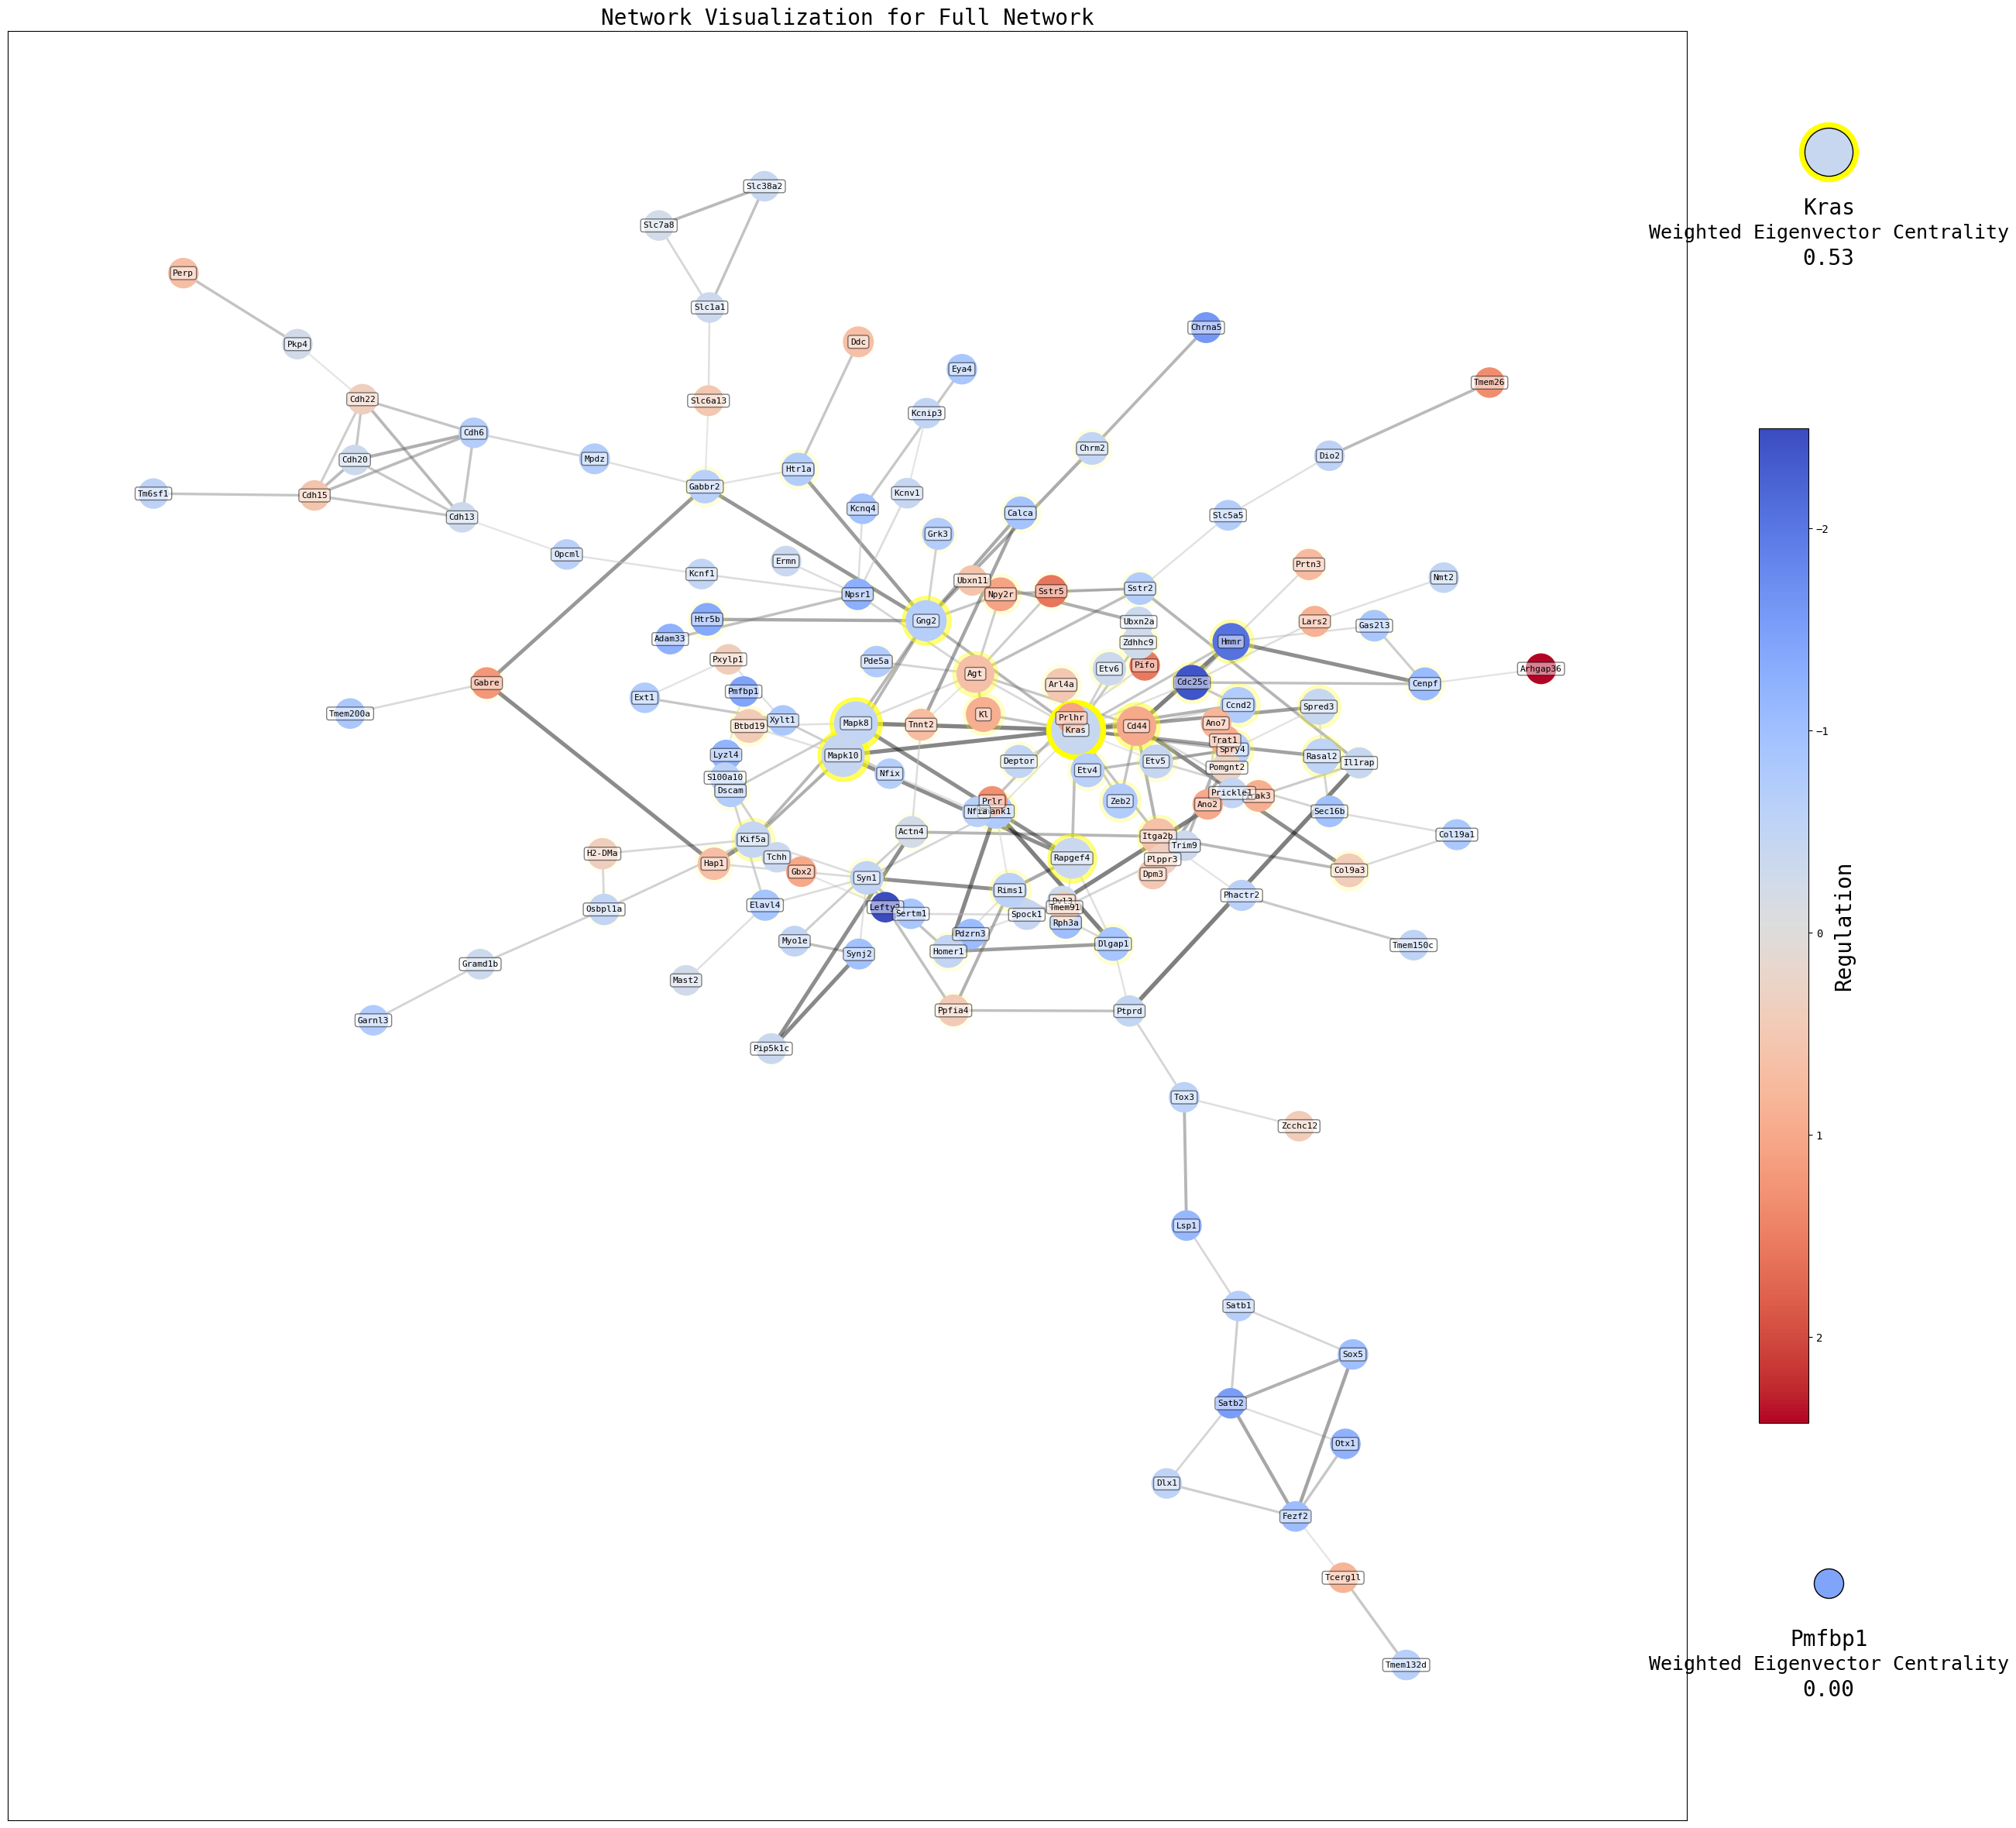

Saving regulatory network to ./regNetworks/fullNetwork.png


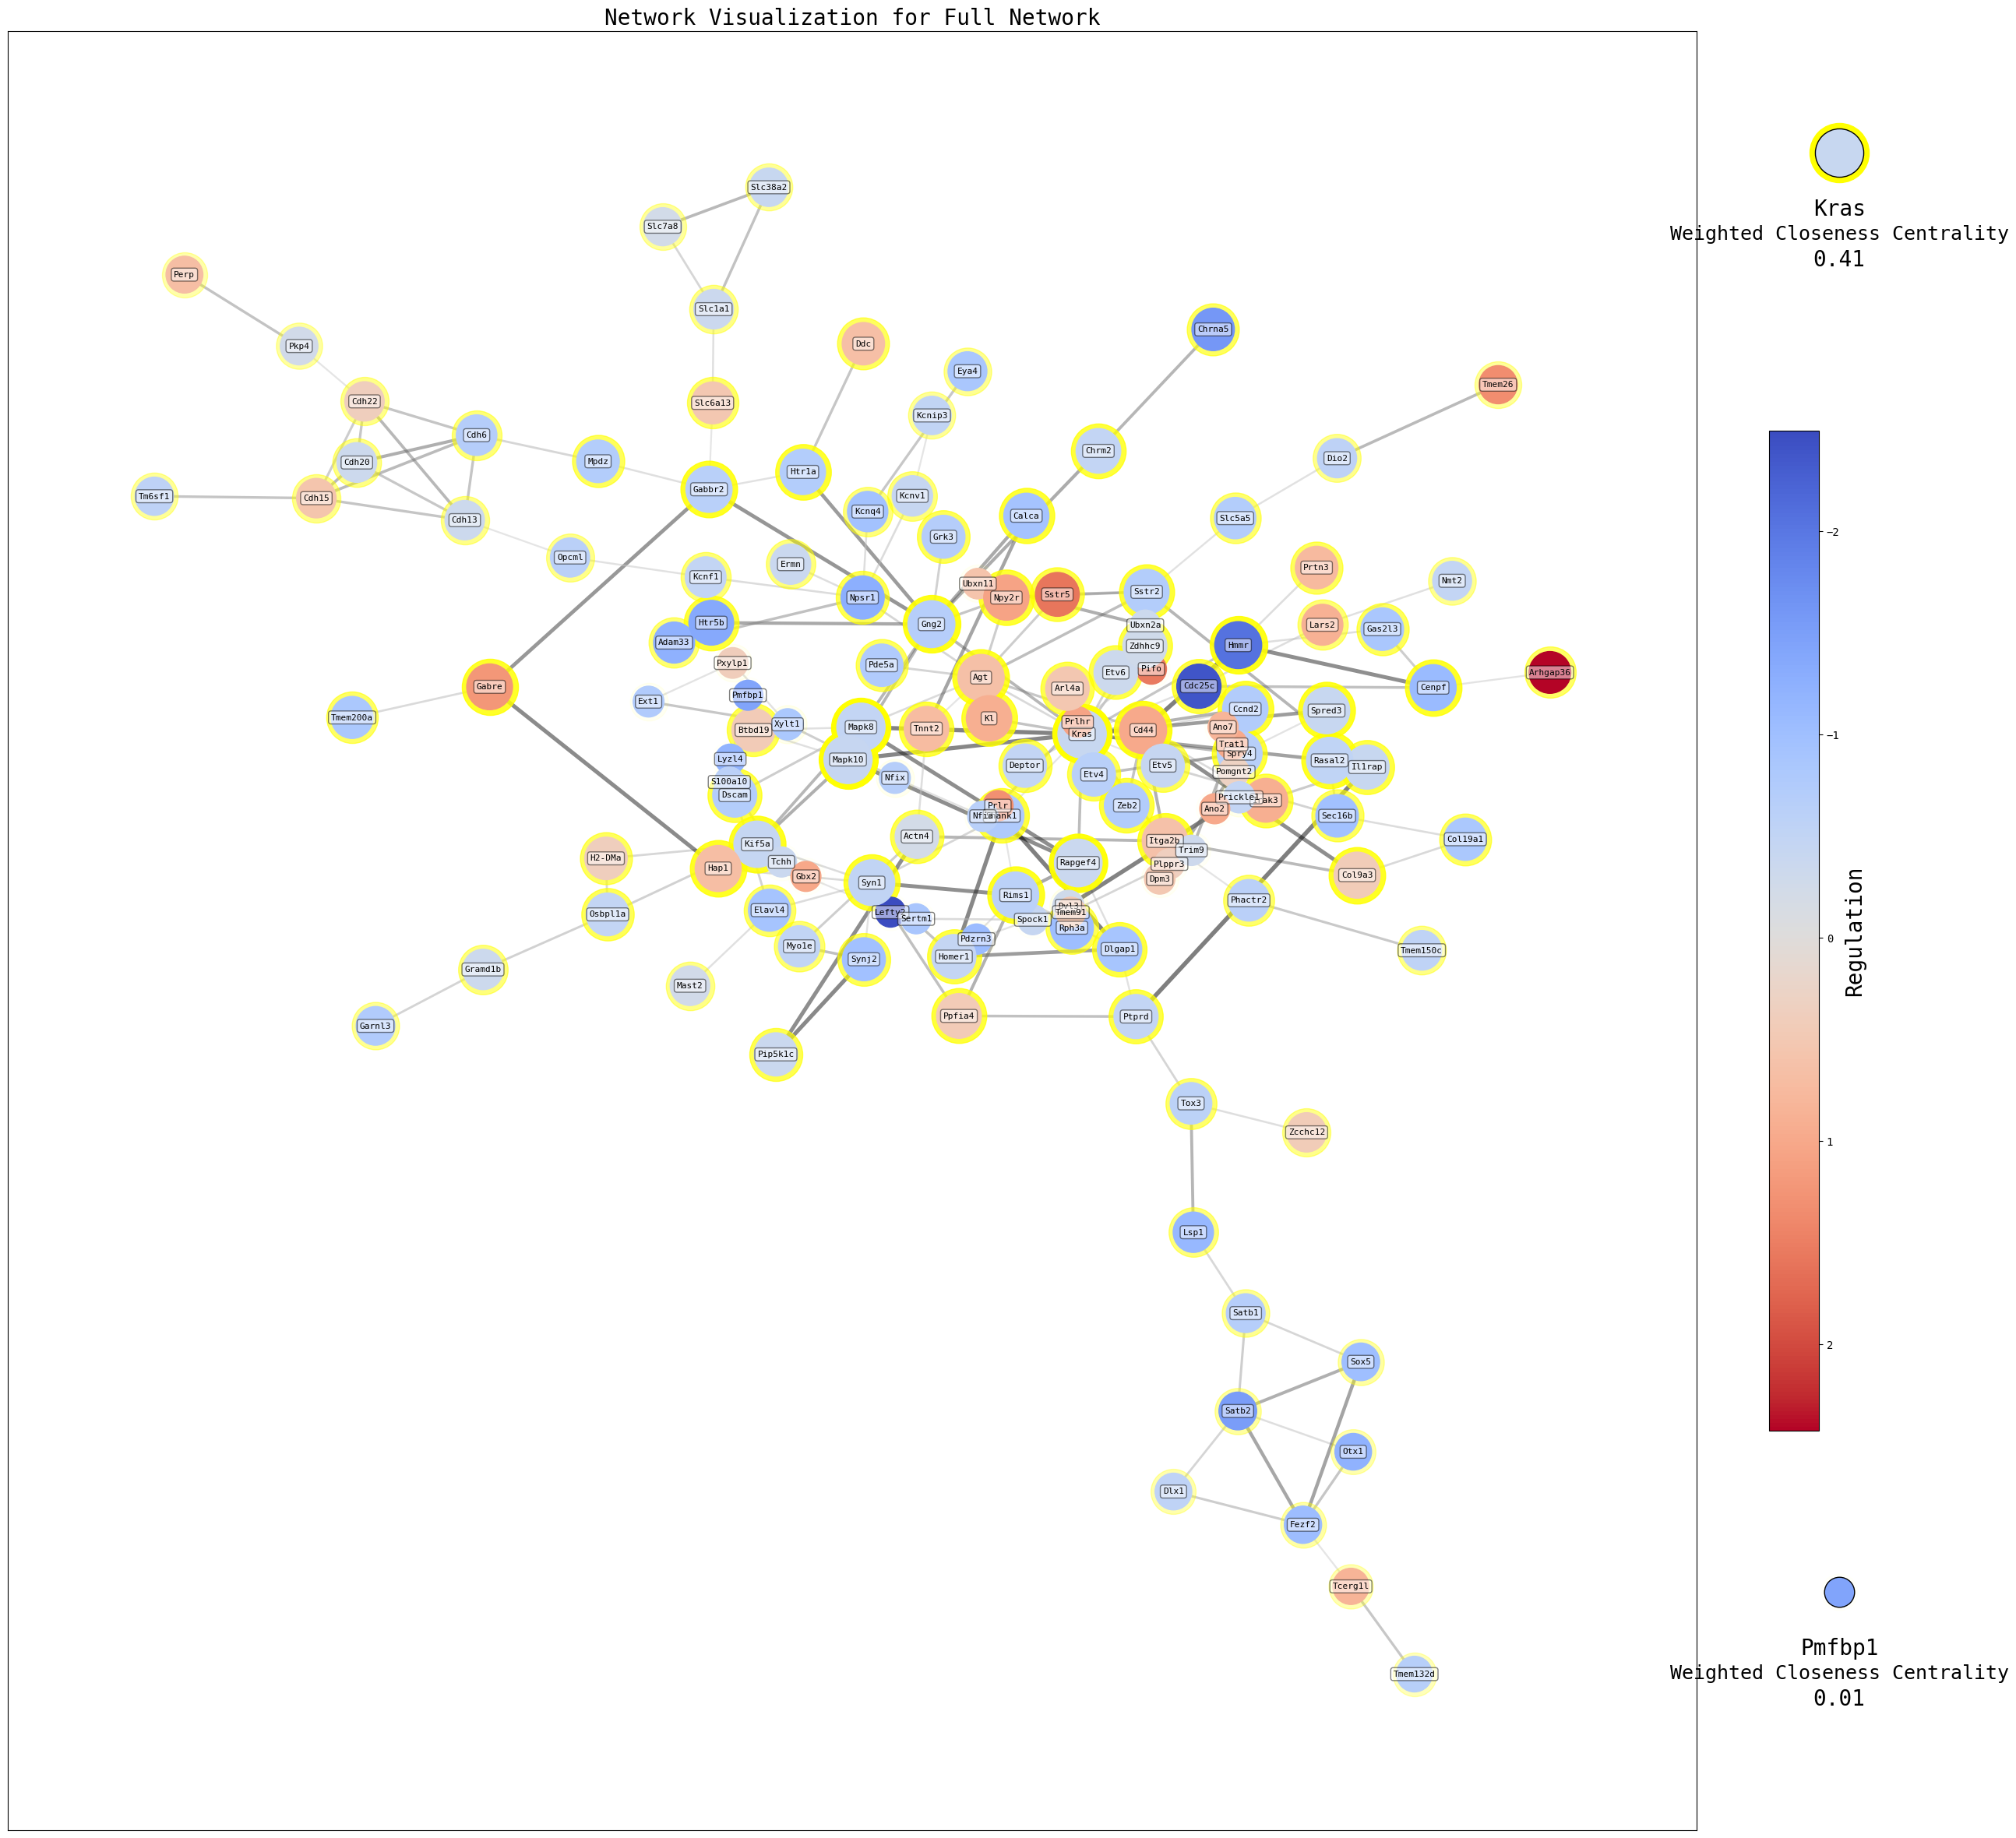

In [1]:
import biocomet as bc
from biocomet import examples

genes = examples.mm_1_genes
reg = examples.mm_1_reg


G = bc.PPIGraph(genes, reg_list=reg, organism='mouse', auto_load=True)
# Arc Plot Visualization
#G.plot_arc(show=True, background='transparent')

G.plot_reg_networks(full_network=True, show=True, background='transparent', centrality_measure='w_eigenvector')
G.plot_reg_networks(full_network=True, show=True, background='transparent', centrality_measure='w_closeness')
# G.plot_Wordclouds_PPI(full_network=False)
# G.plot_Wordclouds(full_network=False)


In [ ]:
G.plot_arc()

In [ ]:
G.plot_circos()

In [ ]:

G.plot_reg_networks(full_network=True, show=True)


In [ ]:
G.plot_KEGG(show=True)

In [ ]:
G.community_detection(algorithm='louvain')

G.get_functional_annotation(categories='default')
#G.get_functional_annotation(categories='all')


In [ ]:
G.func_annotation

In [ ]:
G.reg_list